In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
E=[]
measured=[]
measured_error=[]

known=[]
known_error=[]

f=open('murho-measured.txt','r')
for line in f.readlines():
    line = line.strip().split()
    nrg=float(line[0])
    mval=float(line[1])
    merr=float(line[2])
    
    E.append(nrg)
    measured.append(mval)
    measured_error.append(merr)
    
f.close()

g=open('murho-known.txt','r')
for line in g.readlines():
    line = line.strip().split()
    kval = float(line[1])
    kerr = 0.025*kval
    
    known.append(kval)
    known_error.append(kerr)
    
g.close()
print(known_error)

[0.011110000000000002, 0.0091525, 0.00664, 0.0057775000000000005, 0.0025875, 0.001489, 0.0013610000000000002]


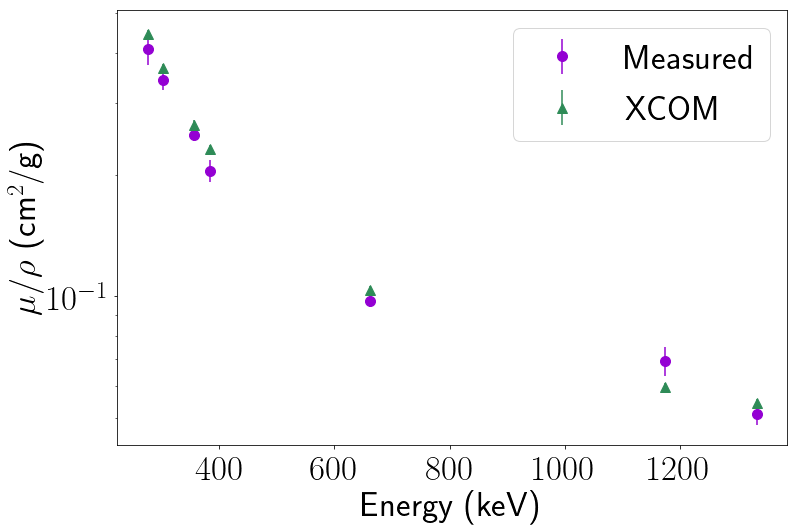

In [15]:
plt.rc('text', usetex=True)

fig=plt.figure(figsize=(12,8))

plt.errorbar(E,measured,yerr=measured_error,fmt='o',ls="none",color="darkviolet",markersize=10,label='Measured')
plt.errorbar(E,known,yerr=known_error,fmt='^',ls='none',color='seagreen',markersize=10,label='XCOM')
plt.yscale('log')
plt.xlabel("Energy (keV)",fontsize=35)
plt.ylabel(r"$\mu/\rho$ (cm$^2$/g)",fontsize=35)
plt.tick_params(axis='x',labelsize=35)
plt.tick_params(axis='y',labelsize=35)
plt.legend(loc='best',fontsize=35)

plt.savefig('murho-vs-xcom-pb.png')